<a href="https://colab.research.google.com/github/moonzkid/deccan-advanced-python-course/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:Sunanda pandey
enrollment number:0016

In [2]:
#import libraries
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read the dataset
df= pd.read_csv('/content/sample_data/research-papers.csv')


df.shape                     #number of columns present
df

,Unnamed: 0,id,Title,Summary,Author,Link,Publish Date,Update Date,Primary Category,Category
0,0,cs/9308101v1,Dynamic Backtracking,Because of their occasional need to return to ...,M. L. Ginsberg,http://arxiv.org/pdf/cs/9308101v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
1,1,cs/9308102v1,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-underst...,M. P. Wellman,http://arxiv.org/pdf/cs/9308102v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
2,2,cs/9309101v1,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in GS...,I. P. Gent,http://arxiv.org/pdf/cs/9309101v1,1993-09-01T00:00:00Z,1993-09-01T00:00:00Z,cs.AI,['cs.AI']
3,3,cs/9311101v1,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (!)...,F. Bergadano,http://arxiv.org/pdf/cs/9311101v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
4,4,cs/9311102v1,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to recor...,J. C. Schlimmer,http://arxiv.org/pdf/cs/9311102v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
...,...,...,...,...,...,...,...,...,...,...
53469,53469,math/0603084v1,Advances on nonparametric regression for funct...,We consider the problem of predicting a real r...,Frédéric Ferraty,http://arxiv.org/pdf/math/0603084v1,2006-03-03T13:25:42Z,2006-03-03T13:25:42Z,math.ST,"['math.ST', 'stat.TH']"
53470,53470,math/0603123v1,Ranking and empirical minimization of U-statis...,"The problem of ranking/ordering instances, ins...",Stéphan Clémençon,http://arxiv.org/pdf/math/0603123v1,2006-03-05T17:10:54Z,2006-03-05T17:10:54Z,math.ST,"['math.ST', 'stat.TH', '68Q32, 60G99, 62G99, 6..."
53471,53471,math/0603130v1,Nonparametric methods for inference in the pre...,"We suggest two nonparametric approaches, based...",Peter Hall,http://arxiv.org/pdf/math/0603130v1,2006-03-06T07:31:27Z,2006-03-06T07:31:27Z,math.ST,"['math.ST', 'stat.TH', '62G08 (Primary) 62G20 ..."
53472,53472,math/0603132v1,Functional linear regression analysis for long...,We propose nonparametric methods for functiona...,Fang Yao,http://arxiv.org/pdf/math/0603132v1,2006-03-06T08:09:42Z,2006-03-06T08:09:42Z,math.ST,"['math.ST', 'stat.TH', '62M20 (Primary) 60G15,..."


In [4]:
df.columns

Index(['Unnamed: 0', 'id', 'Title', 'Summary', 'Author', 'Link',
       'Publish Date', 'Update Date', 'Primary Category', 'Category'],
      dtype='object')

In [5]:
#separate input and output data
input_data= df["Summary"]                    #input data
output_data= df["Primary Category"]          #output data


In [6]:
input_data.head()


0    Because of their occasional need to return to ...
1    Market price systems constitute a well-underst...
2    We describe an extensive study of search in GS...
3    As real logic programmers normally use cut (!)...
4    To support the goal of allowing users to recor...
Name: Summary, dtype: object

In [7]:
output_data

0          cs.AI
1          cs.AI
2          cs.AI
3          cs.AI
4          cs.AI
          ...   
53469    math.ST
53470    math.ST
53471    math.ST
53472    math.ST
53473    math.ST
Name: Primary Category, Length: 53474, dtype: object

Primary Category
math.ST               702
math-ph               701
cs.IT                 700
cond-mat.stat-mech    383
cond-mat.soft         373
                     ... 
q-fin.ST              123
comp-gas              114
cs.GL                 104
physics.atom-ph       100
cond-mat                4
Name: count, Length: 154, dtype: int64

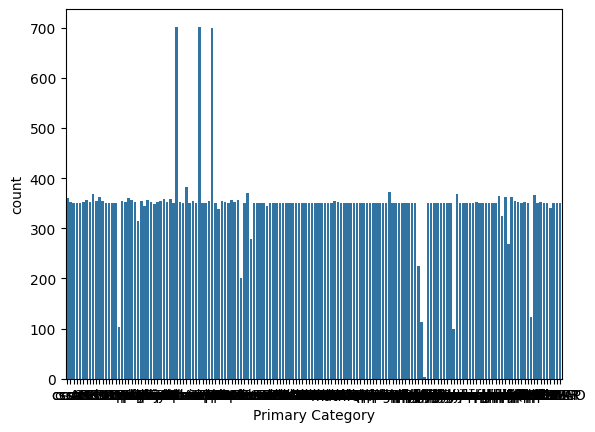

In [8]:
#explore output data
set(output_data)
sns.countplot(x = output_data)
output_data.value_counts()




([<matplotlib.patches.Wedge at 0x7adafa55f3d0>,
 [Text(1.0990646163494038, 0.04535382110404983, 'math.ST'),
  Text(1.0915990629829744, 0.13568892988999695, 'math-ph'),
  Text(1.0767477541646493, 0.2249761629626216, 'cs.IT'),
  Text(1.0602642863462388, 0.292984032156534, 'cond-mat.stat-mech'),
  Text(1.046210086605809, 0.33977117989062233, 'cond-mat.soft'),
  Text(1.0303641763975893, 0.38516186726689033, 'econ.GN'),
  Text(1.0126509873334473, 0.42957883776158584, 'physics.bio-ph'),
  Text(0.9931075022933545, 0.4730089733701202, 'cs.CY'),
  Text(0.971763024843416, 0.5154382829662293, 'q-fin.GN'),
  Text(0.9487377116523625, 0.5566837113555944, 'q-bio.BM'),
  Text(0.9241030862784626, 0.596685416220826, 'cs.DC'),
  Text(0.8978576032727311, 0.6354932920537771, 'q-bio.QM'),
  Text(0.8700229991309595, 0.6730973042459542, 'q-bio.MN'),
  Text(0.8406562489798876, 0.7094343317397781, 'cs.SE'),
  Text(0.8098604650200344, 0.7443964180445348, 'cs.AI'),
  Text(0.7777489147514837, 0.7778859978190182, '

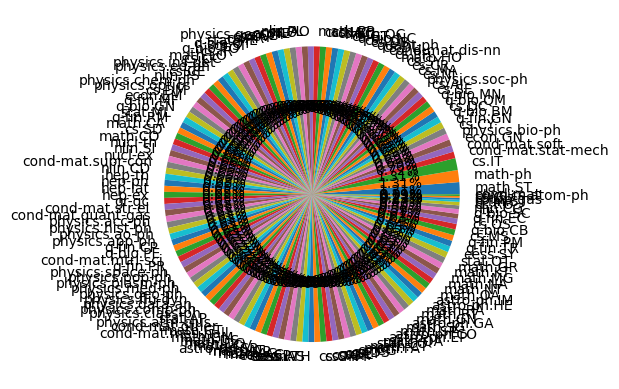

In [9]:
plt.pie(output_data.value_counts(), labels=output_data.value_counts().index, autopct='%2.2f%%')

In [10]:
#data preparation

In [42]:
import re,string

In [43]:
def cleanSummary(SummaryText):
  SummaryText = re.sub('http\S+\s*', ' ', SummaryText)            #remove urls
  SummaryText = re.sub('RT|cc', ' ', SummaryText)                 #remove RT and cc
  SummaryText = re.sub('#\S+', ' ', SummaryText)                  #remove hashtags
  SummaryText = re.sub('@\S+', ' ', SummaryText)                  #remove mentions
  SummaryText = re.sub('[%s]' % re.escape(string.punctuation), ' ', SummaryText)        #remove punctuations
  SummaryText = re.sub(r'[^\x00-\x7f]', r' ', SummaryText)          #replace ascii letters other than those specified
  SummaryText = re.sub('\s+', ' ', SummaryText)                     #remove extra white space
  return SummaryText

In [49]:
cleanSummary(df['Summary'][0])


'Because of their o asional need to return to shallow points in a search tree existing backtracking methods can sometimes erase meaningful progress toward solving a search problem In this paper we present a method by which backtrack points can be moved deeper in the search space thereby avoiding this difficulty The technique developed is a variant of dependency directed backtracking that uses only polynomial space while still providing useful control information and retaining the completeness guarantees provided by earlier approaches '

In [50]:
cleaned = input_data.apply(lambda a:cleanSummary(a))

vectorize data

In [59]:
#import class
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
#create object
tfidf= TfidfVectorizer()            #analyzer is the parameter here

In [61]:
vec = tfidf.fit_transform(cleaned)                #vectorizing cleaned data

In [62]:
vec

<53474x86302 sparse matrix of type '<class 'numpy.float64'>'
	with 4036231 stored elements in Compressed Sparse Row format>

In [63]:
vec.shape

(53474, 86302)

cross validation

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(vec, output_data, random_state = 0)

In [67]:
x_train.shape

(40105, 86302)

In [68]:
x_test.shape

(13369, 86302)

building the model

In [69]:
#importing the class
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn= KNeighborsClassifier(n_neighbors=6)

In [71]:
knn.fit(x_train, y_train)           #training algorithm

KNeighborsClassifier(n_neighbors=6)

performance evaluation

In [72]:
y_pred = knn.predict(x_test)

In [73]:
y_pred

array(['cs.OS', 'math.GR', 'cond-mat.supr-con', ..., 'cs.FL', 'cs.CE',
       'math.GR'], dtype=object)

In [74]:
#confusion matrix and accuracy of the model
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

<Figure size 3000x3000 with 0 Axes>

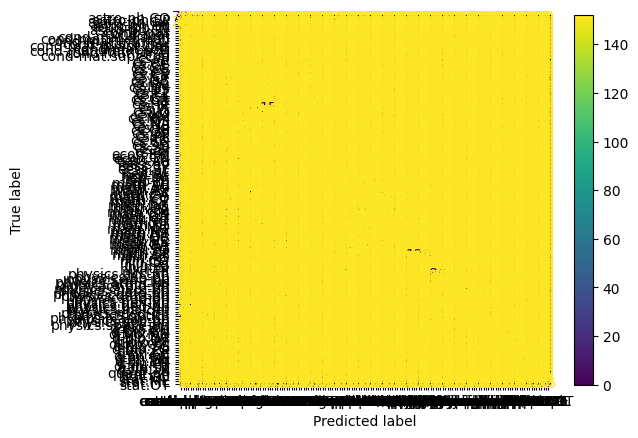

In [79]:
plt.figure(figsize=(30,30))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [76]:
accuracy_score(y_test,y_pred)*100

47.01922357693171

Question2: sarcasm-clusters.txt

In [80]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tweets=[]

In [95]:
#read the dataset
with open('/content/sample_data/sarcasm-clusters.txt', 'r') as file:
    content = file.read()

content = list(content.split('\n'))
content

["It feels like just a few days ago it was the last day of school . Now it's the end of July . 😐 ",
 "I love my mom . No matter what we go through , no matter how much we argue , because I know , at the end , she'll always be there . ",
 'Bump that music ... #imtryingtosleep ',
 "Mexican and black jokes are pretty much the same . Once you've heard Juan , you've heard Jamal .",
 'How to find work you love :',
 '"@WolfpackAlan : You know what I like to do ? Answer my own questions . "" @elenecoetzer"',
 'You seem like a basketball player ! — I am Thank you !',
 'Just because you say Swag in every other sentence doesnt mean you have it . ',
 "if i had my license the only thing i'd use it for is mcdonalds at 3am ",
 'When people give me directions I tend to concentrate very hard on trying to look attentive and I forget to listen . ',
 '@pitchfork @EODMofficial WE LOVE YOU ! STAY SAFE WHEREVER YOU ARE !',
 "RT Every country has an Independence Day except Britain because they're the one's ev

convert tweets into dataframe

In [99]:
df = pd.DataFrame(content, columns=['tweets'])
df

,tweets
0,It feels like just a few days ago it was the l...
1,"I love my mom . No matter what we go through ,..."
2,Bump that music ... #imtryingtosleep
3,Mexican and black jokes are pretty much the sa...
4,How to find work you love :
...,...
51185,"Some days you're the Titanic , some days you'r..."
51186,"Congrats on the release of 25 @Adele , let's h..."
51187,doing my favorite thing .. crying
51188,@TheSupremEC0URT roommate of the week really l...


data cleaning

In [96]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
#define a function for text cleaning
def clean_text(sent):
  t1= word_tokenize(sent)
  t2= [x.lower() for x in tokens1 if x.isalpha()]       #lowercasing
  t3= [x for x in tokens2 if x not in swords]          #stopword removal
  t4= [ps.stem(x) for x in tokens3]                    #stemming
  return t4

In [98]:
clean_text(content)

TypeError: expected string or bytes-like object